In [121]:
#For classification:-

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from scipy.stats import zscore
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,cross_val_score

from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier


from sklearn.metrics import roc_auc_score,recall_score
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

from sklearn.model_selection import GridSearchCV

from sklearn.externals import joblib

#For Regression:-

from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor

from sklearn.ensemble import AdaBoostRegressor
from xgboost import XGBRegressor

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score


# 1-Classification -->Target='region'

In [122]:
df=pd.read_csv('E:\\avocadozip.csv')
pd.set_option('display.max_columns',None)

In [123]:
df.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [124]:
df.shape

(18249, 14)

# Checking the dataset attributes

In [125]:
df['Unnamed: 0'].value_counts()

7     432
11    432
1     432
2     432
3     432
4     432
5     432
6     432
8     432
9     432
10    432
0     432
43    324
18    324
20    324
14    324
35    324
19    324
30    324
50    324
34    324
46    324
27    324
49    324
33    324
17    324
15    324
48    324
32    324
16    324
36    324
45    324
21    324
24    324
12    324
42    324
26    324
28    324
41    324
25    324
44    324
40    324
13    324
39    324
23    324
31    324
38    324
22    324
29    324
37    324
47    324
51    322
52    107
Name: Unnamed: 0, dtype: int64

In [126]:
df['type'].value_counts()

conventional    9126
organic         9123
Name: type, dtype: int64

In [127]:
df['year'].value_counts()

2017    5722
2016    5616
2015    5615
2018    1296
Name: year, dtype: int64

In [128]:
df['region'].value_counts()

Roanoke                338
SanFrancisco           338
California             338
Spokane                338
Syracuse               338
Northeast              338
MiamiFtLauderdale      338
Nashville              338
PhoenixTucson          338
RaleighGreensboro      338
Jacksonville           338
SanDiego               338
West                   338
NewYork                338
BuffaloRochester       338
Seattle                338
Plains                 338
Southeast              338
TotalUS                338
DallasFtWorth          338
NorthernNewEngland     338
StLouis                338
Houston                338
CincinnatiDayton       338
Boston                 338
Columbus               338
Denver                 338
Boise                  338
Albany                 338
NewOrleansMobile       338
RichmondNorfolk        338
Chicago                338
Sacramento             338
Atlanta                338
Philadelphia           338
LasVegas               338
Indianapolis           338
H

In [129]:
df.dtypes

Unnamed: 0        int64
Date             object
AveragePrice    float64
Total Volume    float64
4046            float64
4225            float64
4770            float64
Total Bags      float64
Small Bags      float64
Large Bags      float64
XLarge Bags     float64
type             object
year              int64
region           object
dtype: object

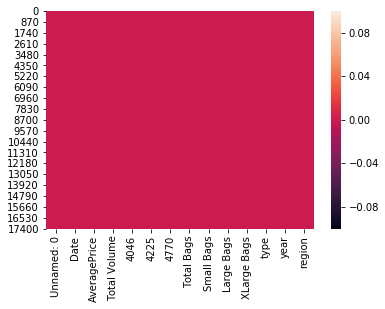

In [130]:
sns.heatmap(df.isnull())  

In [131]:
df.isnull().sum()

Unnamed: 0      0
Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

# EDA

# Univariate analysis

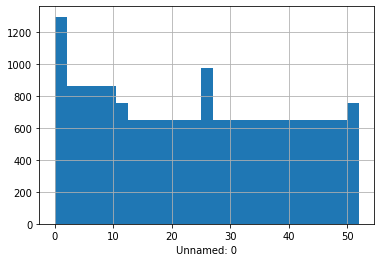

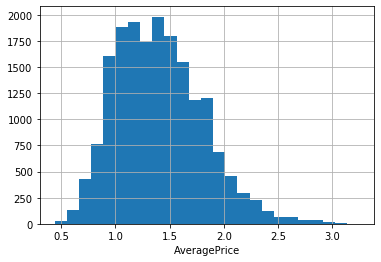

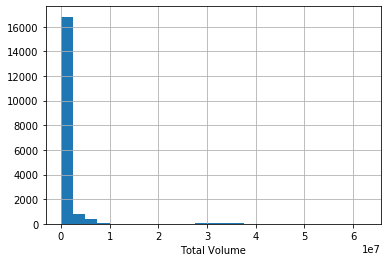

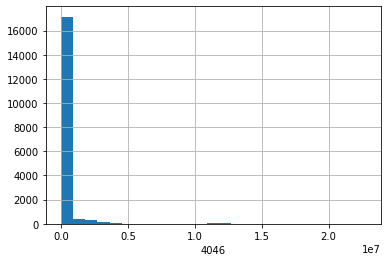

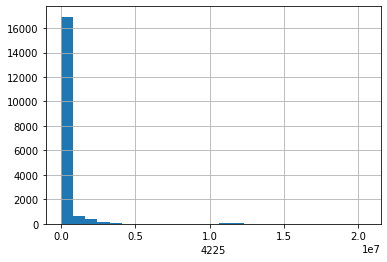

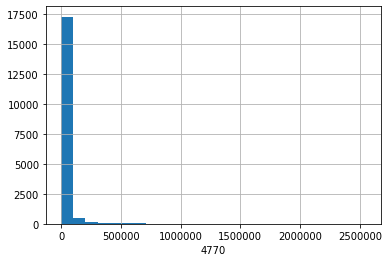

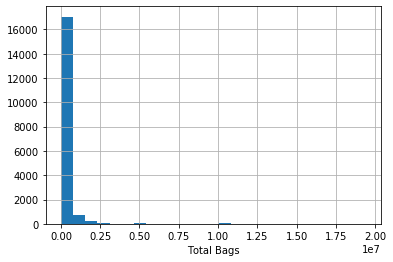

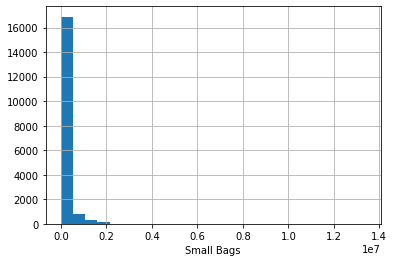

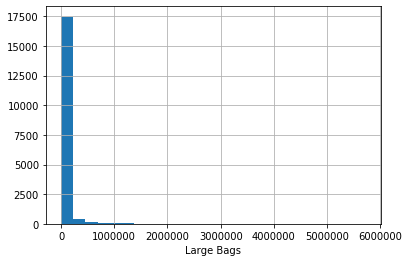

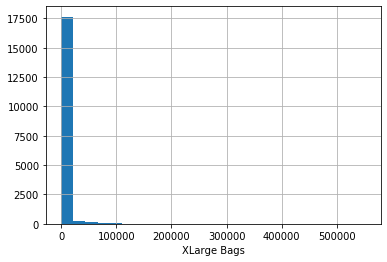

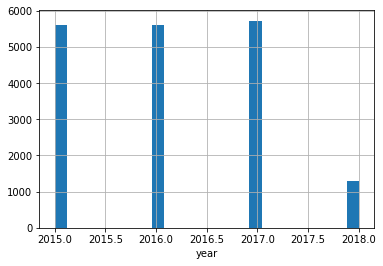

In [61]:
#checking for skewness
numerical_features=[feature for feature in df.columns if df[feature].dtypes!='object']
for feature in numerical_features:
    
    df[feature].hist(bins=25)
    plt.xlabel(feature)
    plt.show()

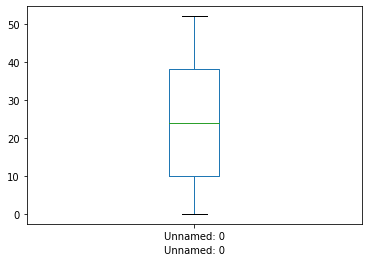

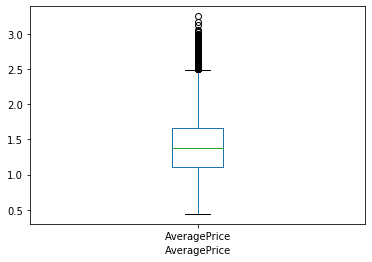

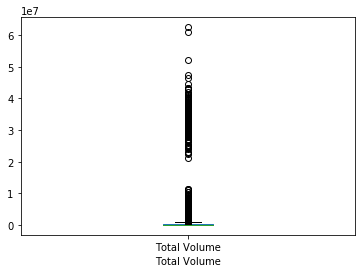

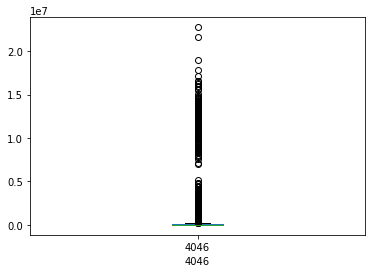

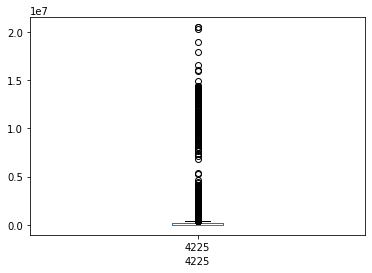

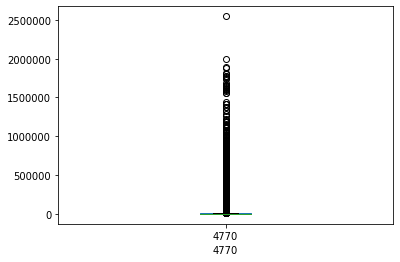

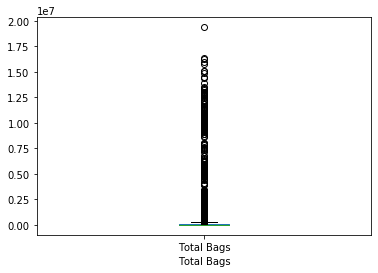

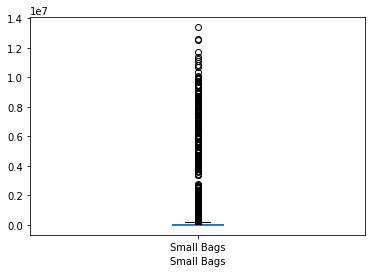

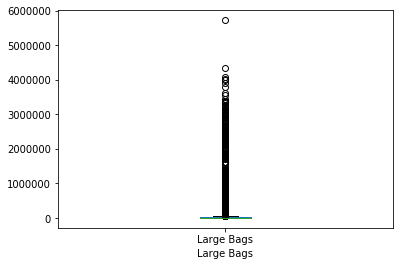

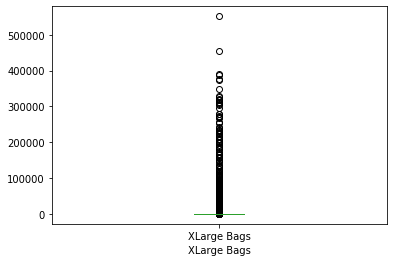

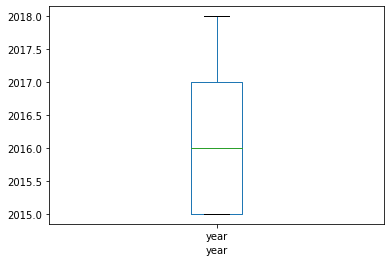

In [62]:
#checking for outliers

numerical_features=[feature for feature in df.columns if df[feature].dtypes!='object']
for feature in numerical_features:
    
    df[feature].plot.box()
    plt.xlabel(feature)
    plt.show()

# Bivariate analysis

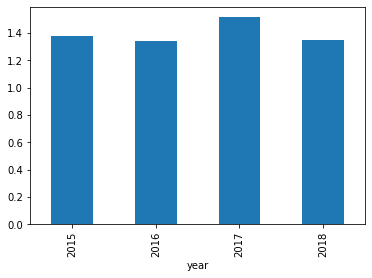

In [63]:
df.groupby(['year'])['AveragePrice'].mean().plot.bar()
#AveragePrice per avocado in year 2016 was higher as compared to 2015

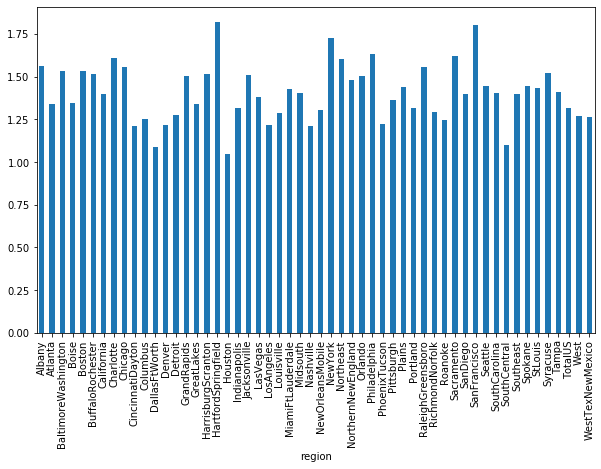

In [64]:
plt.figure(figsize=(10,6))
df.groupby('region')['AveragePrice'].mean().plot.bar()
#region wise averageprice of avocado

# Feature Engineering

# Label Encoding

In [132]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['region']=le.fit_transform(df['region'])

In [133]:
df['type']=le.fit_transform(df['type'])

In [134]:
df.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,0,2015,0
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,0,2015,0
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,0,2015,0
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,0,2015,0
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,0,2015,0


# Changing object type to date format

In [135]:
df['Date']=pd.to_datetime(df['Date'], format='%Y-%m-%d')

In [136]:
new_df=pd.DataFrame({'Year':df['Date'].dt.year,
                     'month':df['Date'].dt.month,
                     'day':df['Date'].dt.day,
                     'week':df['Date'].dt.week,           
                    'quater':df['Date'].dt.quarter})

In [137]:
df=pd.concat([df,new_df],axis=1)
df.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Year,month,day,week,quater
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,0,2015,0,2015,12,27,52,4
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,0,2015,0,2015,12,20,51,4
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,0,2015,0,2015,12,13,50,4
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,0,2015,0,2015,12,6,49,4
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,0,2015,0,2015,11,29,48,4


# Changing column name

In [138]:
df['New']=df['Unnamed: 0']
#for convinience we are changing the name of column,later we will drop the original column.

In [139]:
#checking correlation between columns before dropping them.
df.corr()
#type column has no correlation with either AveragePrice nor region
#none of the negatively correlated columns with the target have very high values.

,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Year,month,day,week,quater,New
Unnamed: 0,1.000000,-0.133008,0.014035,0.017628,0.019829,0.041752,-0.002219,0.000347,-0.009196,-0.011546,-0.000288,-0.171667,-0.000489,-0.171667,-0.777730,-0.088097,-0.708965,-0.743843,1.000000
AveragePrice,-0.133008,1.000000,-0.192752,-0.208317,-0.172928,-0.179446,-0.177088,-0.174730,-0.172940,-0.117592,0.615845,0.093197,-0.011716,0.093197,0.162409,0.027386,0.146383,0.172177,-0.133008
Total Volume,0.014035,-0.192752,1.000000,0.977863,0.974181,0.872202,0.963047,0.967238,0.880640,0.747157,-0.232434,0.017193,0.174176,0.017193,-0.024689,-0.009747,-0.024217,-0.025484,0.014035
4046,0.017628,-0.208317,0.977863,1.000000,0.926110,0.833389,0.920057,0.925280,0.838645,0.699377,-0.225819,0.003353,0.192073,0.003353,-0.025803,-0.010159,-0.026268,-0.027167,0.017628
4225,0.019829,-0.172928,0.974181,0.926110,1.000000,0.887855,0.905787,0.916031,0.810015,0.688809,-0.232289,-0.009559,0.145726,-0.009559,-0.022108,-0.012393,-0.019965,-0.022079,0.019829
4770,0.041752,-0.179446,0.872202,0.833389,0.887855,1.000000,0.792314,0.802733,0.698471,0.679861,-0.210027,-0.036531,0.095252,-0.036531,-0.033424,-0.009009,-0.032542,-0.033886,0.041752
Total Bags,-0.002219,-0.177088,0.963047,0.920057,0.905787,0.792314,1.000000,0.994335,0.943009,0.804233,-0.217788,0.071552,0.175256,0.071552,-0.022724,-0.004988,-0.023189,-0.023742,-0.002219
Small Bags,0.000347,-0.174730,0.967238,0.925280,0.916031,0.802733,0.994335,1.000000,0.902589,0.806845,-0.220535,0.063915,0.164702,0.063915,-0.023126,-0.003870,-0.023766,-0.024371,0.000347
Large Bags,-0.009196,-0.172940,0.880640,0.838645,0.810015,0.698471,0.943009,0.902589,1.000000,0.710858,-0.193177,0.087891,0.198768,0.087891,-0.020187,-0.008352,-0.019949,-0.020424,-0.009196
XLarge Bags,-0.011546,-0.117592,0.747157,0.699377,0.688809,0.679861,0.804233,0.806845,0.710858,1.000000,-0.175483,0.081033,0.082281,0.081033,-0.012969,0.000319,-0.015233,-0.014023,-0.011546


# Dropping Date column

In [140]:
df=df.drop(['Date','Unnamed: 0','type'],axis=1)#we have extracted data from date column,hence no use of the column.
                                            #we made a new column 'new' and changed the name
                                            #All the values were same

# Removing outliers

In [141]:
from scipy.stats import zscore
z=abs(zscore(df))
z.shape

(18249, 17)

In [142]:
df=df[(z<3).all(axis=1)]
df.shape

(17651, 17)

# Skewness treatment

In [143]:
df.skew()

AveragePrice    0.377432
Total Volume    3.767138
4046            4.909848
4225            4.455745
4770            5.117170
Total Bags      4.066771
Small Bags      4.222706
Large Bags      5.053434
XLarge Bags     6.135607
year            0.229976
region          0.012798
Year            0.229976
month           0.107408
day             0.011778
week            0.108457
quater          0.110486
New             0.106116
dtype: float64

# Saving the cleaned data for Regression

In [145]:
df.to_csv('E:\\cleanedavocado_zip.csv',index=False)

# Separating target and independent variables

In [78]:
y=df['region']
X=df.drop(['region'],axis=1)

# Applying Power transformation to remove skewness

In [79]:
from sklearn.preprocessing import PowerTransformer
pt=PowerTransformer(method='yeo-johnson') 
X_power=pt.fit_transform(X)
df=pd.DataFrame(X_power,columns=X.columns)

In [80]:
df.skew()

AveragePrice    0.000464
Total Volume   -0.008642
4046           -0.039282
4225           -0.044675
4770            0.024168
Total Bags     -0.022204
Small Bags     -0.024405
Large Bags     -0.110913
XLarge Bags     0.853758
year            0.227731
Year            0.227731
month          -0.146554
day            -0.208926
week           -0.214846
quater         -0.067238
New            -0.243656
dtype: float64

In [81]:
df.head()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,Year,month,day,week,quater,New
0,-0.117824,-0.075324,-0.657421,0.351430,-0.222566,-0.537507,-0.347421,-0.781153,-0.677919,-1.210647,-1.210647,1.491383,1.227565,1.521479,1.307847,-1.966939
1,-0.064330,-0.147497,-0.777179,0.269513,-0.175223,-0.498128,-0.311322,-0.771198,-0.677919,-1.210647,-1.210647,1.491383,0.538229,1.475239,1.307847,-1.790941
2,-1.298865,0.205556,-0.731776,0.649333,0.023923,-0.566369,-0.374453,-0.758523,-0.677919,-1.210647,-1.210647,1.491383,-0.218959,1.428657,1.307847,-1.646881
3,-0.829026,0.019655,-0.632592,0.468799,-0.121164,-0.713068,-0.510991,-0.699123,-0.677919,-1.210647,-1.210647,1.491383,-1.094426,1.381724,1.307847,-1.520296
4,-0.253635,-0.180674,-0.684504,0.262126,-0.110491,-0.686312,-0.490534,-0.607027,-0.677919,-1.210647,-1.210647,1.276081,1.415364,1.334430,1.307847,-1.405299


# Scaling the data

In [82]:
#Applying Standard scalar to independent variable only
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
X_scaled=ss.fit_transform(X)
x=pd.DataFrame(data=X_scaled,columns=X.columns)


# Model building

In [110]:
from sklearn.model_selection import train_test_split,cross_val_score
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,stratify=y)

In [111]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier

In [112]:
knn=KNeighborsClassifier()
svc=SVC()
lr=LogisticRegression()
dt=DecisionTreeClassifier()
gnb=GaussianNB()
rfc=RandomForestClassifier()
xgb=XGBClassifier()
gbc=GradientBoostingClassifier()
ada=AdaBoostClassifier()

In [113]:
models=[]
models.append(('KNeighborsClassifier',knn))
models.append(('SVC',svc))
models.append(('LogisticRegression',lr))
models.append(('DecisionTreeClassifier',dt))
models.append(('GaussianNB',gnb))
models.append(('RandomForestClassifier',rfc))
models.append(('XGBClassifier',xgb))
models.append(('GradientBoostingClassifier',gbc))
models.append(('AdaBoostClassifier',ada))

In [109]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

***************** KNeighborsClassifier *******************


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')


Accuracy_score  - 0.18944029005211874


cross_val_score  - 0.1359207583569331


classification report
               precision    recall  f1-score   support

           0       0.00      0.02      0.01        85
           1       0.08      0.30      0.13        84
           2       0.14      0.39      0.21        85
           3       0.04      0.15      0.06        82
           4       0.08      0.20      0.12        85
           5       0.00      0.01      0.01        85
           6       0.36      0.44      0.40        72
           7       0.05      0.11      0.06        83
           8       0.22      0.45      0.30        85
           9       0.19      0.34      0.24        85
          10       0.03      0.07      0.04        8

AxesSubplot(0.125,0.808774;0.62x0.0712264)
***************** DecisionTreeClassifier *******************


DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')


Accuracy_score  - 0.7858599592114208


cross_val_score  - 0.6006409942419988


classification report
               precision    recall  f1-score   support

           0       0.73      0.69      0.71        85
           1       0.74      0.71      0.73        84
           2       0.86      0.88      0.87        85
           3       0.85      0.78      0.82        82
           4       0.86      0.87      0.87        85
           5       0.74      0.73      0.73        85
      

AxesSubplot(0.125,0.808774;0.62x0.0712264)
***************** XGBClassifier *******************


XGBClassifier(base_score=0.5, booster=None, colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints=None,
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method=None, validate_parameters=False, verbosity=None)


Accuracy_score  - 0.8860185814638568


cross_val_score  - 0.717481242113686


classification report
               precision    recall  f1-score   support

           0       0.91      0.87      0.89        85
           1       0.80      0.83      0.81        84
           

AxesSubplot(0.125,0.808774;0.62x0.0712264)
***************** AdaBoostClassifier *******************


AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=50, random_state=None)


Accuracy_score  - 0.06798096532970768


cross_val_score  - 0.05036173651288421


classification report
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        85
           1       0.00      0.00      0.00        84
           2       0.12      0.45      0.19        85
           3       0.12      0.34      0.18        82
           4       0.33      0.01      0.02        85
           5       0.00      0.00      0.00        85
           6       0.00      0.00      0.00        72
           7       0.00      0.00      0.00        83
           8       0.00      0.00      0.00        85
           9       0.00      0.00      0.00        85
          10       0.00      0.00      0.00        84
        

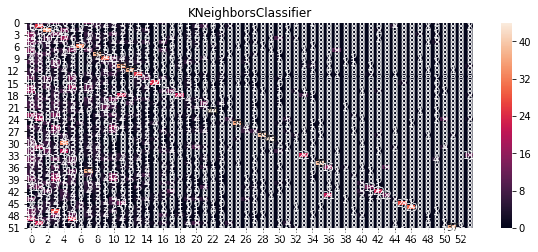

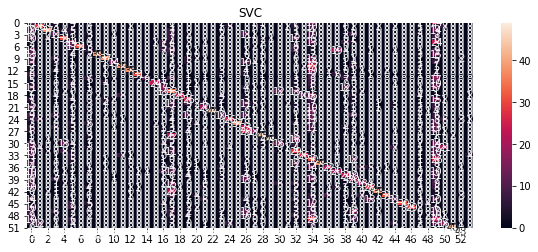

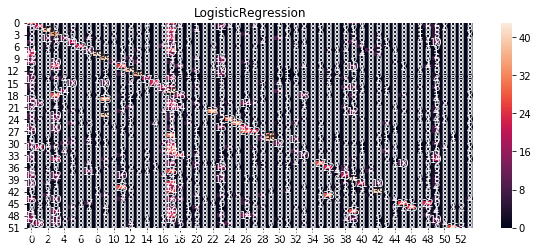

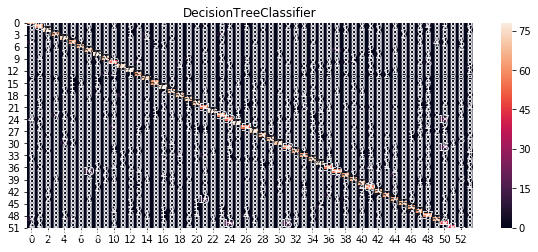

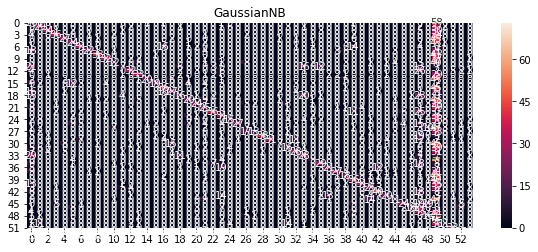

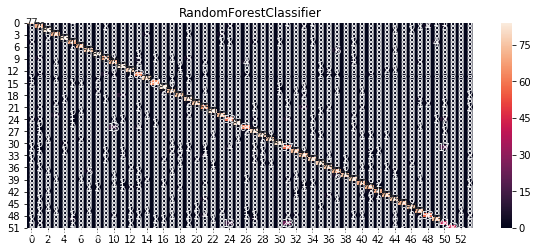

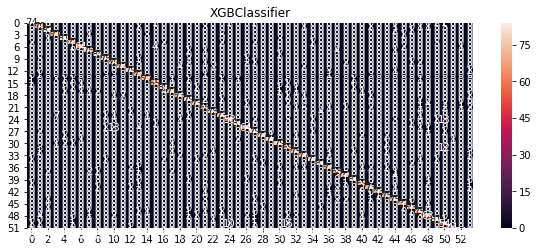

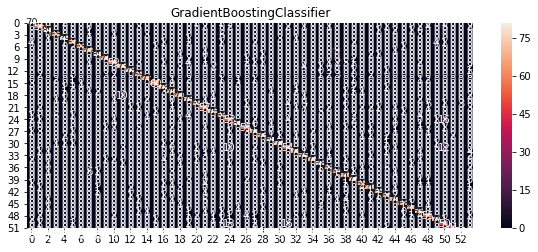

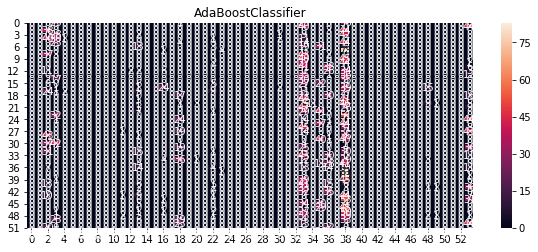

In [88]:
Model=[]
score=[]
cv=[]

for name,model in models:
    print('*****************',name,'*******************')
    print('\n')
    Model.append(name)
    model.fit(x_train,y_train)
    print(model)
    pre=model.predict(x_test)
    print('\n')
    AS=accuracy_score(y_test,pre)
    print('Accuracy_score  -',AS)
    score.append(AS*100)
    print('\n')
    sc=cross_val_score(model,x,y,cv=10,scoring='accuracy').mean()
    print('cross_val_score  -',sc)
    cv.append(sc*100)
    print('\n')
        
    print('classification report\n',classification_report(y_test,pre))
    print('\n')
    cm=confusion_matrix(y_test,pre)
    print(cm)
    print('\n')
    plt.figure(figsize=(10,40))
    plt.subplot(911)
    plt.title(name)
    print(sns.heatmap(cm,annot=True))
    
    
    
    
    
    
    

In [89]:
result=pd.DataFrame({'Model':Model,'Accuracy_score':score,'Cross_val_score':cv})
result

,Model,Accuracy_score,Cross_val_score
0,KNeighborsClassifier,18.944029,13.592076
1,SVC,30.296850,22.247978
2,LogisticRegression,23.022887,18.341019
3,DecisionTreeClassifier,78.585996,60.064099
4,GaussianNB,30.387492,25.121761
5,RandomForestClassifier,87.672785,69.142003
6,XGBClassifier,88.601858,71.748124
7,GradientBoostingClassifier,83.820530,68.005389
8,AdaBoostClassifier,6.798097,5.036174


In [177]:
#We can see from the table XGBClassifier is the best performing Algorithms.
#but our target accuracy score is 90%
#to improve the score we will apply gridsearchcv technique to the top performing models.

In [178]:
#First lets calculate the random state of the models at which they perform the best.
#Then we will select the top3 models and do gridsearchcv on them to attain our target score of 90%.

# Finding the best random_state for all models

In [91]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score,recall_score
from sklearn.linear_model import LogisticRegression
def maxaccuracy_score(model,x,y):
    max_accuracy=0
    for r_state in range(42,101):
        
        x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=r_state,stratify=y)
        model.fit(x_train,y_train)
        pred=model.predict(x_test)
        score=accuracy_score(y_test,pred)
        
        if score>max_accuracy:
            max_accuracy=score
            final_r_state=r_state
    print('max_accuracy_score is at random_state  ',final_r_state,'  which is  ',max_accuracy)
    return final_r_state

In [ ]:
#As my dataset is big,the run time is too high(>24hours),still i dint get the output for adaboost and gradientboost.
#so i am not considering  adaboost and gradientboost models in further actions.

In [114]:
print('knn',maxaccuracy_score(knn,x,y))
print('svc',maxaccuracy_score(svc,x,y))
print('lr',maxaccuracy_score(lr,x,y))
print('dt',maxaccuracy_score(dt,x,y))
print('gnb',maxaccuracy_score(gnb,x,y))
print('rfc',maxaccuracy_score(rfc,x,y))
print('xgb',maxaccuracy_score(xgb,x,y))
#print('gbc',maxaccuracy_score(gbc,x,y))
#print('ada',maxaccuracy_score(ada,x,y))

max_accuracy_score is at random_state   70   which is   0.1991842284160435
knn 70
max_accuracy_score is at random_state   72   which is   0.3115794244278269
svc 72
max_accuracy_score is at random_state   68   which is   0.24518468162247903
lr 68
max_accuracy_score is at random_state   48   which is   0.7940176750509857
dt 48
max_accuracy_score is at random_state   72   which is   0.32132336279175167
gnb 72
max_accuracy_score is at random_state   58   which is   0.8855653750283254
rfc 58
max_accuracy_score is at random_state   61   which is   0.8896442329481079
xgb 61


In [ ]:
#We can see 'Xgboost' is performing the best 
 
#selecting our top 2 models to be used for gridsearchcv

#model-1-->XGBoostClassifier(accuracy=88.96%)at random_state=61
#model-2-->RandomForestClassifier(accuracy=88.55%)at random_state=58

# GridsearchCV

# model-2-->RandomForestClassifier(accuracy=88.55%) at random_state=56

In [ ]:
rfc=RandomForestClassifier()
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=56,stratify=y)

In [94]:
parameters=[{'max_depth':[5,7,9,10],'min_samples_leaf':[1,2],
            'criterion':['gini','entropy'], 'n_estimators':[100,250,500]}]
            
grid_search=GridSearchCV(rfc,parameters,scoring='accuracy',n_jobs=-1,cv=10)
grid_search=grid_search.fit(x_train,y_train)
grid_search.best_params_ 

{'criterion': 'entropy',
 'max_depth': 10,
 'min_samples_leaf': 1,
 'n_estimators': 250}

In [95]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=56,stratify=y)
rfc=RandomForestClassifier(criterion='entropy',max_depth=10,min_samples_leaf=1,n_estimators=250)
rfc.fit(x_train,y_train)
pred_rfc=rfc.predict(x_test)
score=accuracy_score(y_test,pred_rfc)
print('Accuracy_score=  ',score)

Accuracy_score=   0.879220484930886


# model-1-->XGBoostClassifier(accuracy=84.32%) at random_state=46

In [96]:
xgb=XGBClassifier()
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=46,stratify=y)

In [97]:
parameters=[{'max_depth':[5,7,9,10],'learning_rate':[1,0.1,0.001]}]
            
grid_search=GridSearchCV(xgb,parameters,scoring='accuracy',n_jobs=-1,cv=10)
grid_search=grid_search.fit(x_train,y_train)
grid_search.best_params_ 

{'learning_rate': 0.1, 'max_depth': 10}

In [98]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=46,stratify=y)
xgb=XGBClassifier(learning_rate=0.1,max_depth=10)
xgb.fit(x_train,y_train)
pred_xgb=xgb.predict(x_test)
score=accuracy_score(y_test,pred_xgb)
print('Accuracy_score=  ',score)

Accuracy_score=   0.8794470881486517


# finally saving the XGBoostClassifier model

In [99]:
#From all the models tried above XGBoostClassifier performs the best.
#At random_state=46
xgb=XGBClassifier()
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=46,stratify=y)

In [100]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=46,stratify=y)
xgb=XGBClassifier(learning_rate=0.1,max_depth=10)
xgb.fit(x_train,y_train)
pred_xgb=xgb.predict(x_test)
score=accuracy_score(y_test,pred_xgb)
print('Accuracy_score=  ',score)

Accuracy_score=   0.8794470881486517


In [101]:
from sklearn.externals import joblib
joblib.dump(xgb,'project3-avocado_zipclassification.obj')

['project3-avocado_zipclassification.obj']

In [102]:
model=joblib.load('project3-avocado_zipclassification.obj')

In [103]:
final_predictions=model.predict(x_test)
final_predictions=pd.DataFrame(final_predictions,columns=['region'])
final_predictions.head()

,region
0,35
1,48
2,13
3,26
4,24


# Saving final predictions in file.csv 

In [104]:
final_predictions.to_csv('E:\\final_predictionsavocado_zipclf.csv',index=False)

# Conclusion:-

# 2-Regression -->target=AveragePrice

In [115]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PowerTransformer

from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from xgboost import XGBRegressor

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

from sklearn.externals import joblib

In [146]:
df=pd.read_csv('E:\\cleanedavocado_zip.csv')
df.head()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,region,Year,month,day,week,quater,New
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,2015,0,2015,12,27,52,4,0
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,2015,0,2015,12,20,51,4,1
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,2015,0,2015,12,13,50,4,2
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,2015,0,2015,12,6,49,4,3
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,2015,0,2015,11,29,48,4,4


In [147]:
df.shape

(17651, 17)

# Separating training and testing dataset

In [148]:
y=df['AveragePrice']
x=df.drop(['AveragePrice'],axis=1)

# Removing skewness

In [149]:
x.skew()

Total Volume    3.767138
4046            4.909848
4225            4.455745
4770            5.117170
Total Bags      4.066771
Small Bags      4.222706
Large Bags      5.053434
XLarge Bags     6.135607
year            0.229976
region          0.012798
Year            0.229976
month           0.107408
day             0.011778
week            0.108457
quater          0.110486
New             0.106116
dtype: float64

In [150]:
from sklearn.preprocessing import PowerTransformer
pt=PowerTransformer(method='yeo-johnson') 
x_power=pt.fit_transform(x)
x=pd.DataFrame(x_power,columns=x.columns)

In [151]:
x.skew()

Total Volume   -0.008642
4046           -0.039282
4225           -0.044675
4770            0.024168
Total Bags     -0.022204
Small Bags     -0.024405
Large Bags     -0.110913
XLarge Bags     0.853758
year            0.227731
region         -0.257799
Year            0.227731
month          -0.146554
day            -0.208926
week           -0.214846
quater         -0.067238
New            -0.243656
dtype: float64

# Scaling the data

In [152]:
#Applying Standard scalar to independent variable only
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
x_scaled=ss.fit_transform(x)
x=pd.DataFrame(data=x_scaled,columns=x.columns)


# Model Building

In [153]:
knn=KNeighborsRegressor()
svr=SVR()
lr=LinearRegression()
dt=DecisionTreeRegressor()
gbm=GradientBoostingRegressor()
ada=AdaBoostRegressor()
rfr=RandomForestRegressor()
xgb=XGBRegressor()

In [154]:
models=[]
models.append(('KNeighborsRegressor',knn))
models.append(('SVR',svr))
models.append(('LinearRegression',lr))
models.append(('DecisionTreeRegressor',dt))
models.append(('GradientBoostingRegressor',gbm))
models.append(('AdaBoostRegressor',ada))
models.append(('RandomForestRegressor',rfr))
models.append(('XGBRegressor',xgb))

In [155]:
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.model_selection import train_test_split,cross_val_score
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42)

In [156]:
Model=[]
r2score=[]
rmse=[]
cv=[]

for name,model in models:
    print('*****************',name,'*******************')
    print('\n')
    Model.append(name)
    model.fit(x_train,y_train)
    print(model)
    pre=model.predict(x_test)
    print('\n')
    score=r2_score(y_test,pre)
    print('R2score  -',score)
    r2score.append(score*100)
    print('\n')
    sc=cross_val_score(model,x,y,cv=5,scoring='r2').mean()
    print('cross_val_score  -',sc)
    cv.append(sc*100)
    print('\n')
    rmsescore=np.sqrt(mean_squared_error(y_test,pre))
    print('rmse_score  -',rmsescore)
    rmse.append(rmsescore)
    print('\n')
    

***************** KNeighborsRegressor *******************


KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                    weights='uniform')


R2score  - 0.7838843949303708


cross_val_score  - -0.4866176197590688


rmse_score  - 0.18015644433905495


***************** SVR *******************


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
    gamma='auto_deprecated', kernel='rbf', max_iter=-1, shrinking=True,
    tol=0.001, verbose=False)


R2score  - 0.7747457928893017


cross_val_score  - -0.13950299374418226


rmse_score  - 0.18392602872145525


***************** LinearRegression *******************


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)


R2score  - 0.521873824664842


cross_val_score  - 0.054540818416481195


rmse_score  - 0.2679649540372092


***************** DecisionTreeRegressor *******************


DecisionTreeRegre

In [157]:
result=pd.DataFrame({'Model':Model,'R2_score':r2score,'RMSEscore':rmse,'Cross_val_score':cv})
result

,Model,R2_score,RMSEscore,Cross_val_score
0,KNeighborsRegressor,78.388439,0.180156,-48.661762
1,SVR,77.474579,0.183926,-13.950299
2,LinearRegression,52.187382,0.267965,5.454082
3,DecisionTreeRegressor,72.706289,0.202459,-50.744455
4,GradientBoostingRegressor,72.376092,0.203680,11.273458
5,AdaBoostRegressor,52.415319,0.267325,-19.442757
6,RandomForestRegressor,86.743573,0.141098,-0.605799
7,XGBRegressor,90.619942,0.118689,25.670377


In [61]:
#hence XGBRegressor is the best performing Algorithm for the taken dataset.
#But our target score is 90%
#to achieve 90% score we will apply Gridsearchcv technique to the top3 performing models.

In [62]:
#First lets calculate the random state of the models at which they perform the best.
#Then we will select the top3 models and do gridsearchcv on them to attain our target score of 90%.

# Finding the best random_state for all models

In [158]:
def maxr2_score(model,x,y):
    max_r_score=0
    for r_state in range(42,101):
        
        x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=r_state,test_size=0.25)
        model.fit(x_train,y_train)
        pred=model.predict(x_test)
        score=r2_score(y_test,pred)
        
        if score>max_r_score:
            max_r_score=score
            final_r_state=r_state
    print('max_r2_score is at random_state  ',final_r_state,'  which is  ',max_r_score)
    return final_r_state
    

In [159]:
print('knn',maxr2_score(knn,x,y))
print('SVR',maxr2_score(svr,x,y))
print('lr',maxr2_score(lr,x,y))
print('dt',maxr2_score(dt,x,y))
print('gbm',maxr2_score(gbm,x,y))
print('rfr',maxr2_score(rfr,x,y))
print('xgb',maxr2_score(xgb,x,y))

print('ada',maxr2_score(ada,x,y))

max_r2_score is at random_state   89   which is   0.7981231497366591
knn 89
max_r2_score is at random_state   64   which is   0.784687184758413
SVR 64
max_r2_score is at random_state   82   which is   0.5311905566109101
lr 82
max_r2_score is at random_state   85   which is   0.7697880241655699
dt 85
max_r2_score is at random_state   56   which is   0.740462539603475
gbm 56
max_r2_score is at random_state   82   which is   0.8745318231950083
rfr 82
max_r2_score is at random_state   53   which is   0.9074907919999643
xgb 53
max_r2_score is at random_state   89   which is   0.5322835149803327
ada 89



# GridSearchCV

# model1->RandomForestRegressor(random_state=82)-score=87.45%

In [160]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=82)
RandomForestRegressor()

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators='warn',
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [161]:
parameters=[{'max_depth':[5,7,9,10],'min_samples_leaf':[1,2],'n_estimators':[100,250,500]}]
            
grid_search=GridSearchCV(rfr,parameters,scoring='r2',n_jobs=-1,cv=5)
grid_search=grid_search.fit(x_train,y_train)
grid_search.best_params_ 

{'max_depth': 10, 'min_samples_leaf': 1, 'n_estimators': 500}

In [162]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=43)
rfr=RandomForestRegressor(max_depth=10,min_samples_leaf=1,n_estimators=500)
rfr.fit(x_train,y_train)
pred_rfr=rfr.predict(x_test)
score=r2_score(y_test,pred_rfr)
print('R2_score=  ',score)

R2_score=   0.8132695319281901


# model2->XGBoost(random_state=53)=90.74%

In [166]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=53)
xgb=XGBRegressor()

In [167]:
from sklearn.model_selection import GridSearchCV

parameters=[{'max_depth':[5,7,9,10],
            'learning_rate':[0.1,0.05,0.001]}]
            
grid_search=GridSearchCV(gbm,parameters,n_jobs=-1,cv=5)
grid_search=grid_search.fit(x_train,y_train)
grid_search.best_params_ 

{'learning_rate': 0.1, 'max_depth': 9}

In [168]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=53)
xgb=XGBRegressor(max_depth=9,learning_rate=0.1)
xgb.fit(x_train,y_train)
pred_xgb=xgb.predict(x_test)
score=r2_score(y_test,pred_xgb)
print('R2_score=  ',score)

R2_score=   0.916076975943299


# model3->GradientBoostingRegressor(random_state=56)=74.04%

In [163]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=53)
gbm=GradientBoostingRegressor()

In [164]:
from sklearn.model_selection import GridSearchCV

parameters=[{'max_depth':[5,7,9,10],'min_samples_leaf':[1,2],
            'learning_rate':[0.1,0.05,0.001], 'n_estimators':[50,100]}]
            
grid_search=GridSearchCV(gbm,parameters,n_jobs=-1,cv=5)
grid_search=grid_search.fit(x_train,y_train)
grid_search.best_params_ 

{'learning_rate': 0.1,
 'max_depth': 9,
 'min_samples_leaf': 2,
 'n_estimators': 100}

In [165]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=94)
gbm=GradientBoostingRegressor(learning_rate=0.1,max_depth=9,min_samples_leaf=2,n_estimators=100)
gbm.fit(x_train,y_train)
pred_gbm=gbm.predict(x_test)
score=r2_score(y_test,pred_gbm)
print('R2_score=  ',score)
print('RMSE score= ',np.sqrt(mean_squared_error(y_test,pred_gbm)))

R2_score=   0.8988937498605275
RMSE score=  0.1218049146440768


# Saving the final XGBRegressor model

In [169]:
#From all the models tried above XGBRegressor performs the best.
#At random_state=53
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=53)
xgb=XGBRegressor()

In [179]:
xgb=XGBRegressor(max_depth=9,learning_rate=0.1)
xgb.fit(x_train,y_train)
pred_xgb=xgb.predict(x_test)
score=r2_score(y_test,pred_xgb)
rmse=np.sqrt(mean_squared_error(y_test,pred_rfr))
print('R2_score=  ',score)
print('RMSE score',rmse)

R2_score=   0.916076975943299
RMSE score 0.49852924015281364


In [172]:
from sklearn.externals import joblib
joblib.dump(xgb,'Project-3-avocado_zipregression.obj')

['Project-3-avocado_zipregression.obj']

In [173]:
model=joblib.load('Project-3-avocado_zipregression.obj')

In [174]:
final_predictions=model.predict(x_test)
final_predictions=pd.DataFrame(final_predictions,columns=['AveragePrice'])
final_predictions.head()

,AveragePrice
0,1.122568
1,1.737045
2,1.555646
3,2.017077
4,1.372741


# Saving final predictions in file.csv 

In [175]:
final_predictions.to_csv('E:\\final_predictionsavocado_zipreg.csv',index=False)

# Conclusion:-